# The normal distribution

Copied and adapted from OpenStats Intro "[The normal distribution](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/normal_distribution/normal_distribution.html)" lab, a product of OpenIntro that is released under a Creative Commons Attribution-ShareAlike 3.0 Unported. Original lab was adapted for OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel from a lab written by Mark Hansen of UCLA Statistics.

In this lab we’ll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we’ll use graphical tools to assess the normality of our data and also learn how to generate random numbers from a normal distribution.

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

## The Data

This week we’ll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.


In [28]:
bdims = pd.read_csv("bdims.csv")

Let’s take a quick peek at the first few rows of the data.

In [29]:
bdims.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


You’ll see that for every observation we have 25 measurements, many of which are either diameters or girths. A key to the variable names can be found at http://www.openintro.org/stat/data/bdims.php, but we’ll be focusing on just three columns to get started: weight in kg (`wgt`), height in cm (`hgt`), and `sex` (`1` indicates male, `0` indicates female).

Since males and females tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another with only women.

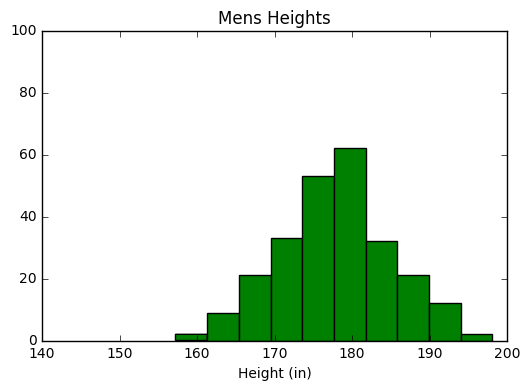

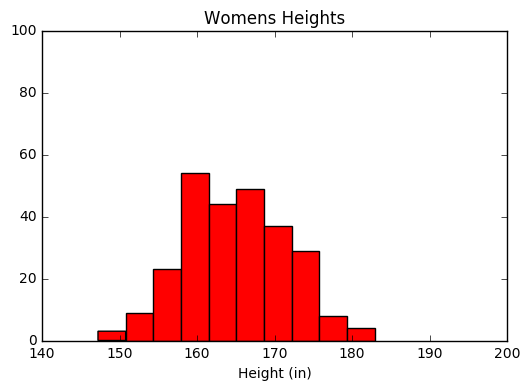

In [52]:
mdims = bdims[ bdims["sex"] == 1]
fdims = bdims[ bdims["sex"] == 0]

plt.hist(mdims["hgt"], color = "green")
plt.title("Mens Heights")
plt.axis([140,200,0,100])
plt.xlabel("Height (in)")
plt.show()
plt.hist(fdims["hgt"], color = "red")
plt.title("Womens Heights")
plt.axis([140,200,0,100])
plt.xlabel("Height (in)")
plt.show()

### Exercise 1

Make a histogram of men’s heights and a histogram of women’s heights. How would you compare the various aspects of the two distributions?

## The normal distribution

In your description of the distributions, did you use words like *bell-shaped* or *normal*? It’s tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We’ll be working with women’s heights, so let’s store them as a separate object and then calculate some statistics that will be referenced later.

In [37]:
fhgtmean = fdims["hgt"].mean()
fhgtstd = fdims["hgt"].std()

mhgtmean = mdims["hgt"].mean()
mhgtstd = mdims["hgt"].std()

Next we make a density histogram to use as the backdrop and overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

In [38]:
# Define the gaussian distribution function
def _gauss(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*pow((x-mu)/sigma,2))
gauss = np.vectorize(_gauss)

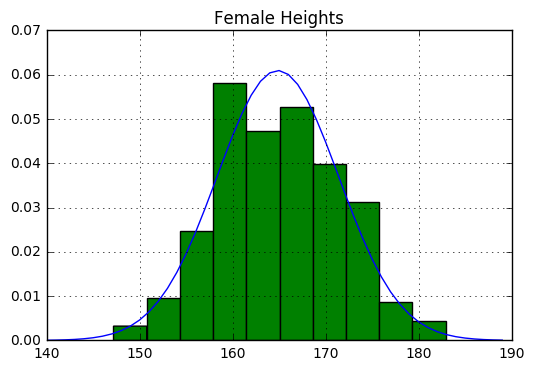

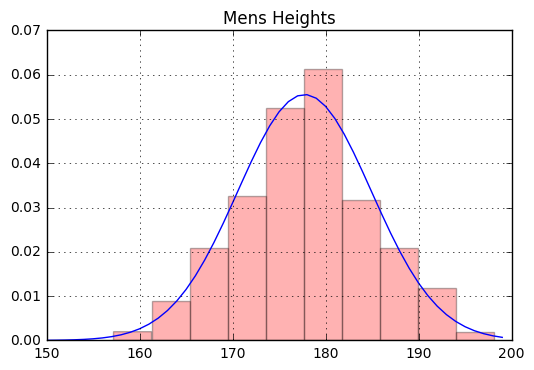

In [55]:
#show female histogram overlayed with normal distribution
ax = fdims["hgt"].hist(normed=True, color = "green") # normed = True returns density histogram
xvals = range(140, 190)
yvals = gauss(xvals, fhgtmean, fhgtstd)
plt.title("Female Heights")
ax.plot(xvals, yvals)
plt.show()

#show male histogram overlayed with normal distribution
ax = mdims["hgt"].hist(normed=True, color = "red", alpha = 0.3)
xvals = range(150,200)
yvals = gauss(xvals, mhgtmean,mhgtstd)
ax.plot(xvals,yvals)
plt.title("Mens Heights")
plt.show()

After plotting the density histogram with the first command, we create the x- and y-coordinates for the normal curve. We chose the `x` range as 140 to 190 in order to span the entire range of `fheight`. To create `y`, we use the above-defined function `guass` to calculate the density of each of those x-values in a distribution that is normal with mean `fhgtmean` and standard deviation `fhgtsd`. The final command draws a curve on the existing plot (the density histogram) by connecting each of the points specified by `x` and `y`. 

### Exercise 2 

Based on the this plot, does it appear that the data follow a nearly normal distribution? Yes


## Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for “quantile-quantile”.

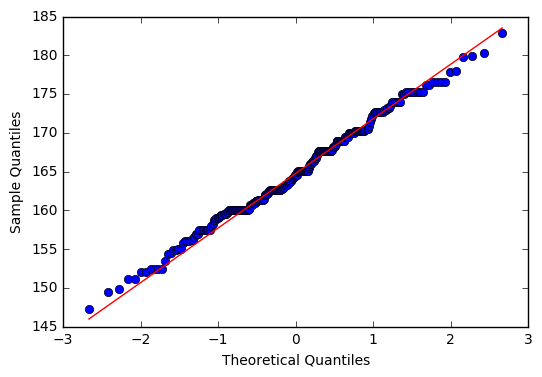

In [56]:
ax_quan = qqplot(fdims["hgt"], line="q")

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using `rnorm`.

In [57]:
sim_norm = np.random.normal(loc=fhgtmean, scale=fhgtstd, size=fdims.shape[0])

The `size` argument indicates how many numbers you’d like to generate, which we specify to be the same number of heights in the `fdims` data set using the first element in the shape attribute. The `loc` and `scale` arguments determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set, `sim_norm`, as well as its normal probability plot.

### Exercise 3

Make a normal probability plot of `sim_norm`. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?

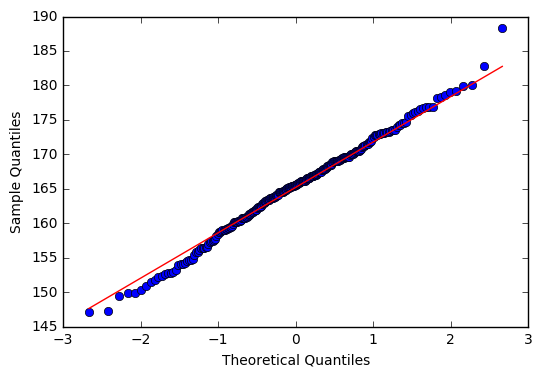

In [58]:
newqqplot = qqplot(sim_norm,line = "q")

Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to several simulations. The function `qqnormsim` defined in the next cell will generate eight simulations and display the probability plot for each of the simulations along side the probability plot for the data. You will not need to modify this function.

In [62]:
def qqnormsim(data):
    """ Plot the normal probability plot for the data set and 
        eight simulations drawn from a normal distribution with 
        the same mean and standard deviation as the data.
        
        Args:
            data -- array_like one-dimensional numerical data
    """
    dmean = data.mean()
    dstd = data.std()
    fig, plots = plt.subplots(3, 3, sharex=True, sharey=True)
    fig.set_size_inches(12, 12)
    plots = plots.flatten()
    print(plots.flatten())
    qqplot(data, line="q", ax=plots[0])
    plots[0].set_title("Normal QQ Plot (Data)")
    for i in range(1,len(plots)):
        sim_data = np.random.normal(loc=dmean, scale=dstd, size=len(data))
        qqplot(sim_data, line="q", ax=plots[i])
        plots[i].set_title("Normal QQ Plot (Sim)")
    for ax in plots:
        ax.set_xlabel("Theoretical Quantiles")
        ax.set_ylabel("Sample Quantiles")
    return fig
        

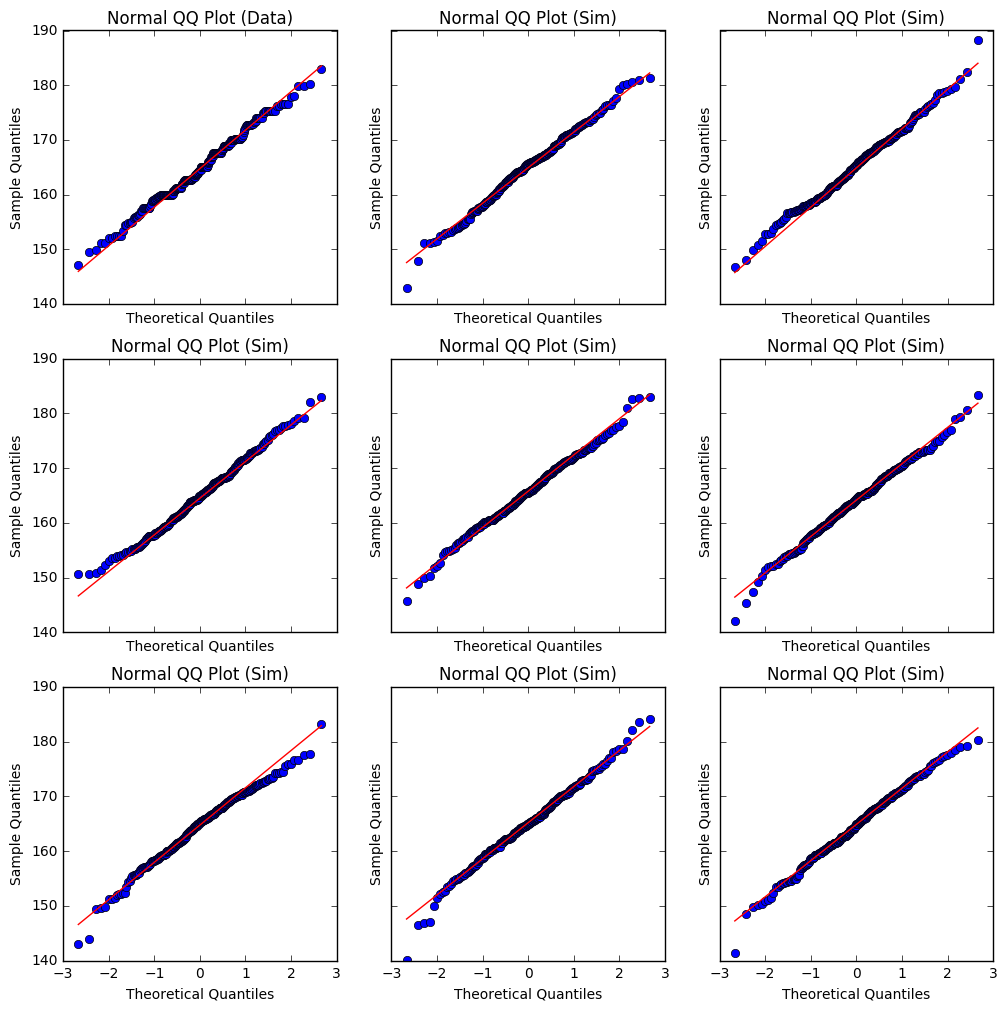

In [63]:
fig = qqnormsim(fdims["hgt"])

### Exercise 4

Does the normal probability plot for `fdims["hgt"]` look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?

### Exercise 5

Using the same technique, determine whether or not female weights appear to come from a normal distribution.

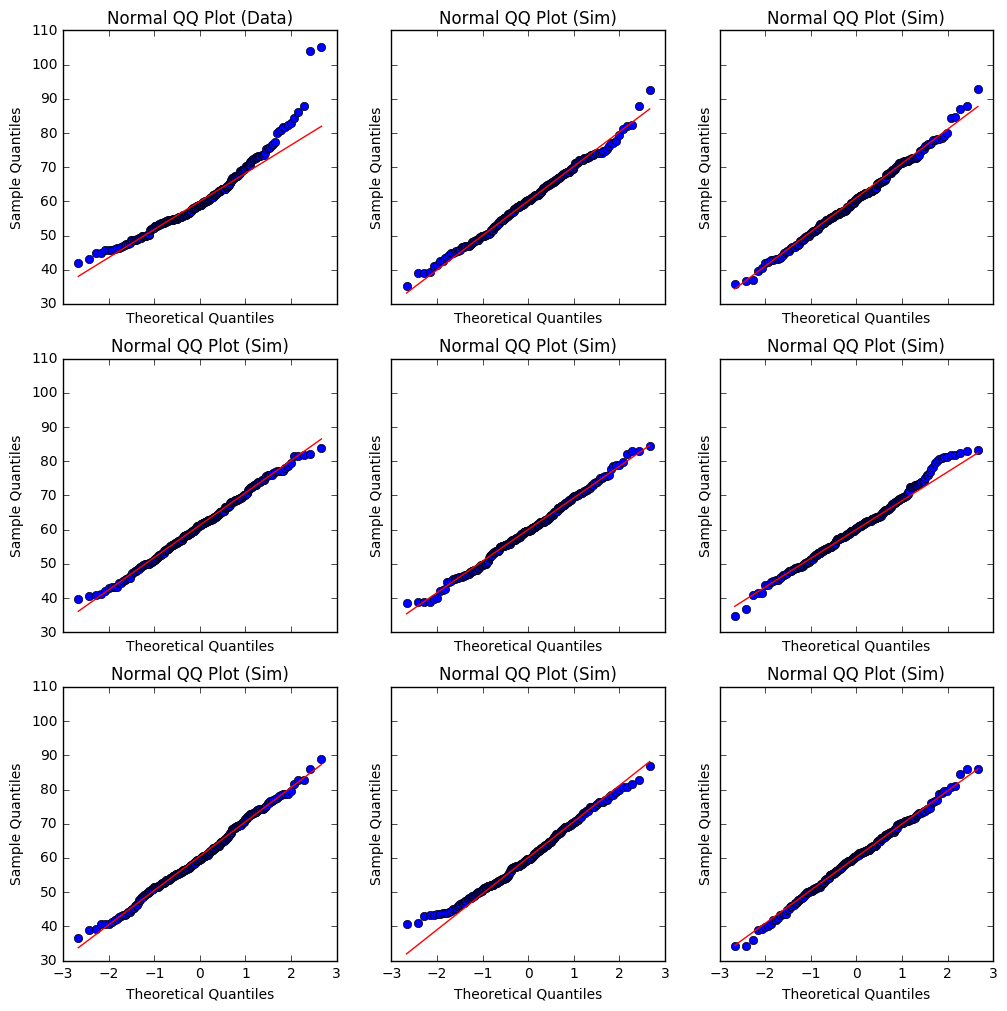

In [66]:
fig = qqnormsim(fdims["wgt"])



## Normal probabilities

Okay, so now you have a slew of tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, “What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?” (The study that published this data set is clear to point out that the sample was not random and therefore inference to a general population is not suggested. We do so here only as an exercise.)

If we assume that female heights are normally distributed (a very close approximation is also okay), we can find this probability using the cumulative distribution function.

In [67]:
1 - norm.cdf(182, loc=fhgtmean, scale=fhgtstd)

0.0044343869186868057

Note that the function `norm.cdf` gives the area under the normal curve below a given value, with a given mean and standard deviation. Since we’re interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

Assuming a normal distribution has allowed us to calculate a theoretical probability. If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [68]:
(fdims["hgt"] > 182).sum() / len(fdims["hgt"]) 

0.0038461538461538464

Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

### Exercise 6

Write out two probability questions that you would like to answer; one regarding female heights and one regarding female weights. Calculate the those probabilities using both the theoretical normal distribution as well as the empirical distribution (four probabilities in all). Which variable, height or weight, had a closer agreement between the two methods?

what percent of females are between 160 and 170 cm tall? 
What is the first quantile of female weights? 

In [73]:
print(norm.cdf(170, loc = fhgtmean, scale = fhgtstd)-norm.cdf(160,loc = fhgtmean,scale = fhgtstd))
print(((fdims["hgt"] < 170).sum()-(fdims["hgt"] < 160).sum())/len(fdims["hgt"]))
 


0.555039181825
0.561538461538


In [94]:
print(fdims["wgt"].quantile(0.25))
sorted = fdims["wgt"].sort_values()
quart = len(fdims["hgt"])/4
print(sorted[[quart]])
#print(sorted[round(0.25*len(fdims["wgt"]))])

54.5
65.0   NaN
Name: wgt, dtype: float64


## On Your Own

1. Now let’s consider some of the other variables in the body dimensions data set. Using the figures at the end of the exercises (run the cell to generate them), match the histogram to its normal probability plot. All of the variables have been standardized (first subtract the mean, then divide by the standard deviation), so the units won’t be of any help. If you are uncertain based on these figures, generate the plots to check.
    * The histogram for female biiliac (pelvic) diameter (`bii.di`) belongs to normal probability plot letter ____.

    * The histogram for female elbow diameter (`elb.di`) belongs to normal probability plot letter ____.

    * The histogram for general age (`age`) belongs to normal probability plot letter ____.

    * The histogram for female chest depth (`che.de`) belongs to normal probability plot letter ____.
1. Note that normal probability plots C and D have a slight stepwise pattern.
Why do you think this is the case?
1. As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (`kne.di`). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.

In [ ]:
import matching
fig = matching.draw_figures()